## Digit Recognizer

We can classyfy each one of them as follows: 
1. 1 or not 1
2. 2 or not 2 <br>
and etc.

In [1]:
import pandas as pd

sample_submission_df = pd.read_csv('../data/digitRecognizer/sample_submission.csv')
test_df = pd.read_csv('../data/digitRecognizer/test.csv')
train_df = pd.read_csv('../data/digitRecognizer/train.csv')

In [2]:
sample_submission_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


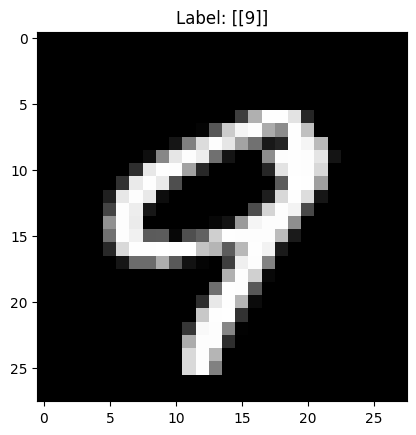

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

data = np.matrix(train_df)
labels = data[:, 0]
images_data = np.delete(data, 0, 1)

img_index = 100
image_flat = images_data[img_index]
image_2d = image_flat.reshape(28,28)

plt.imshow(image_2d, cmap='gray')
plt.title(f"Label: {labels[img_index]}")
plt.show()


### Since logistic regression works best if the features are scaled, we normalizer the pixel values to [0, 1]

In [16]:
X = images_data / 255.0
y = labels.flatten()

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
train_df = pd.read_csv('../data/digitRecognizer/train.csv')

# Split features & labels
X = train_df.drop('label', axis=1).values / 255.0
y = train_df['label'].values

# Split train into train + validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Train logistic regression
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, n_jobs=-1)
model.fit(X_train_pca, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val_pca)

# Compute accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


d:\python projects\MachineLearning\LinearRegression\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Accuracy: 0.9182
